In [75]:
from json import load
from sys import argv
import glob
import os
import time
from datetime import datetime
import chardet

import matplotlib.pyplot as plt

In [97]:
## Jupyter Notebooks
path = "c:/scipts/**/*.ipynb"
files = [x.replace('\\', '/') for x in glob.glob(path,recursive=True)]
path = "c:/scipts/*.ipynb"
files = [x.replace('\\', '/') for x in glob.glob(path,recursive=True)] + files
path = "G:/**/*.ipynb"
files = [x.replace('\\', '/') for x in glob.glob(path,recursive=True)] + files

# Drop some projects
files = [x for x in files if x.split('/')[2] not in ['alaska','autopull','GemPy','venv','CGS']]
len(files)

488

In [98]:
created = []
modified = []

for file in files:
    
    # Both the variables would contain time
    # elapsed since EPOCH in float
    ti_c = os.path.getctime(file)
    ti_m = os.path.getmtime(file)

    # Converting the time in seconds to a timestamp
    if datetime.fromtimestamp(ti_c).year == 2022:
        created.append(file)
        
    elif datetime.fromtimestamp(ti_m).year == 2022:
        modified.append(file)
    
len(created),len(modified)

(118, 37)

In [99]:
lineN = []
characterN = []
packages = []
functions = 0
classes = 0

for file in created:
    
    cells = load(open(file, encoding="utf8"))['cells']
    n = 0
    cn = 0
    pack = []
    
    for cell in cells:
        
        if cell['cell_type'] == 'code':
            n += len(cell['source'])
            st = ''.join(cell['source']).replace('\\','')
            cn += len(st)
            
            # Track Packages, Functions, & Classes
            for line in cell['source']:
                if 'def' in line:
                    functions += 1
                if 'class' in line:
                    classes += 1
                if 'import' in line:
                    line = line.split(' as ')[0].strip()
                    prts = [x for x in line.strip().split(' ') if len(x) > 0]
                    prts = [x for x in prts if x not in ['import','from']]
                    #print(prts)
                    pack.append(prts)

    lineN.append(n)
    characterN.append(cn)
    packages.append(pack)
    
    
sum(lineN),sum(characterN),functions,classes

(40325, 1463754, 447, 41)

In [100]:
## Python
path = "c:/scipts/**/*.py"
files = [x.replace('\\', '/') for x in glob.glob(path,recursive=True)]
path = "c:/scipts/*.py"
files = [x.replace('\\', '/') for x in glob.glob(path,recursive=True)] + files
path = "G:/**/*.py"
files = [x.replace('\\', '/') for x in glob.glob(path,recursive=True)] + files

# Drop some projects
files = [x for x in files if x.split('/')[2] not in ['alaska','autopull','GemPy','venv','CGS']]

len(files)

159

In [101]:
created = []
modified = []

for file in files:
    
    # Both the variables would contain time
    # elapsed since EPOCH in float
    ti_c = os.path.getctime(file)
    ti_m = os.path.getmtime(file)

    # Converting the time in seconds to a timestamp
    if datetime.fromtimestamp(ti_c).year == 2022:
        created.append(file)
        
    elif datetime.fromtimestamp(ti_m).year == 2022:
        modified.append(file)
    
len(created),len(modified)

(29, 1)

In [102]:
## For Python Files
for file in created:
    
    try:
        with open(file, encoding="utf8") as f:
            code = f.read()
    except:
        with open(file, 'rb') as f:
            encode = chardet.detect(f.read())['encoding']
            print(encode)
        with open(file, encoding=encode) as f:
            code = f.read()

    lines = code.split('\n')
    n = len(lines)
    cn = len(code.replace('\\',''))
    
    # Track Packages, Functions, & Classes
    for line in lines:
        if 'def' in line:
            functions += 1
        if 'class' in line:
            classes += 1
        if 'import' in line:
            line = line.split(' as ')[0].strip()
            prts = [x for x in line.strip().split(' ') if len(x) > 0]
            prts = [x for x in prts if x not in ['import','from']]
            #print(prts)
            pack.append(prts)

    lineN.append(n)
    characterN.append(cn)
    packages.append(pack)
    
sum(lineN),sum(characterN),functions,classes

(44524, 1606584, 533, 70)

In [103]:
libraries = [lib[0] for pack in packages for lib in pack]
# Drop commented out ones
libraries = [x for x in libraries if x[0] != '#']
libraries = [x.split('.')[0] for x in libraries]
#'for?'
libraries

['geopandas',
 'pandas',
 'numpy',
 'glob',
 'pandas',
 'shapely',
 'psycopg2',
 'json',
 'sys',
 'glob',
 'os',
 'time',
 'datetime',
 'chardet',
 'matplotlib',
 'if',
 'prts',
 'if',
 'prts',
 'numpy',
 'pandas',
 'geopandas',
 'sklearn',
 'matplotlib',
 'mpl_toolkits',
 'requests',
 'pandas',
 'bs4',
 'numpy',
 'geopandas',
 'time',
 'sqlalchemy',
 'os',
 'geopandas',
 'sqlalchemy',
 'glob',
 'json',
 'sys',
 'glob',
 'os',
 'time',
 'datetime',
 'chardet',
 'matplotlib',
 'if',
 'prts',
 'if',
 'prts',
 'numpy',
 'pandas',
 'geopandas',
 'sklearn',
 'matplotlib',
 'mpl_toolkits',
 'requests',
 'pandas',
 'bs4',
 'numpy',
 'geopandas',
 'time',
 'sqlalchemy',
 'os',
 'geopandas',
 'sqlalchemy',
 'glob',
 'pandas',
 'geopandas',
 'os',
 'shapely',
 'restapi',
 'geopandas',
 'pandas',
 'shapely',
 'multiprocessing',
 'numpy',
 'requests',
 'geopandas',
 'pandas',
 'numpy',
 'matplotlib',
 'pandas',
 'datetime',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 '

In [106]:
libN = {}
for lib in set(libraries):
    if lib in ['','print("Error','display(HTML("<style>']: continue
    libN[lib] = libraries.count(lib)
libN

sorted_libN = sorted(libN.items(), key=lambda x:x[1])
libN = dict(sorted_libN)

libN

{'pyperclip': 1,
 'selenium_stealth': 1,
 'gc': 1,
 'quandl': 1,
 'difflib': 1,
 'numpy_financial': 1,
 'fiona': 1,
 'lxml': 1,
 'xml': 1,
 'rioxarray': 1,
 'basemap': 1,
 'pickle': 1,
 'pathlib': 1,
 'pynput': 1,
 'webdriver_manager': 1,
 'ftplib': 1,
 'pdf2image': 1,
 'networkx': 1,
 'pyvis': 1,
 'xarray': 1,
 'statistics': 1,
 'pytesseract': 2,
 'IPython': 2,
 'pyautogui': 2,
 'nltk': 2,
 'string': 2,
 'warnings': 2,
 'fuzzy_pandas': 2,
 'chardet': 2,
 'restapi': 3,
 'PyPDF2': 3,
 'dash_bootstrap_components': 3,
 'rasterio': 3,
 'multiprocessing': 3,
 'if': 4,
 'fuzzywuzzy': 4,
 'prts': 4,
 'for': 4,
 'colorama': 4,
 'webbrowser': 5,
 'cartopy': 5,
 'mpl_toolkits': 6,
 'base64': 6,
 'psycopg2': 7,
 'PIL': 8,
 'skimage': 9,
 'json': 10,
 'keras_segmentation': 13,
 'setuptools': 30,
 'six': 30,
 'itertools': 31,
 'ssl': 32,
 'calendar': 33,
 'urllib': 35,
 'dash': 36,
 'lasio': 36,
 'xgboost': 38,
 'plotly': 39,
 're': 40,
 'seaborn': 40,
 'scipy': 41,
 'imgaug': 60,
 'tqdm': 60,
 'ke

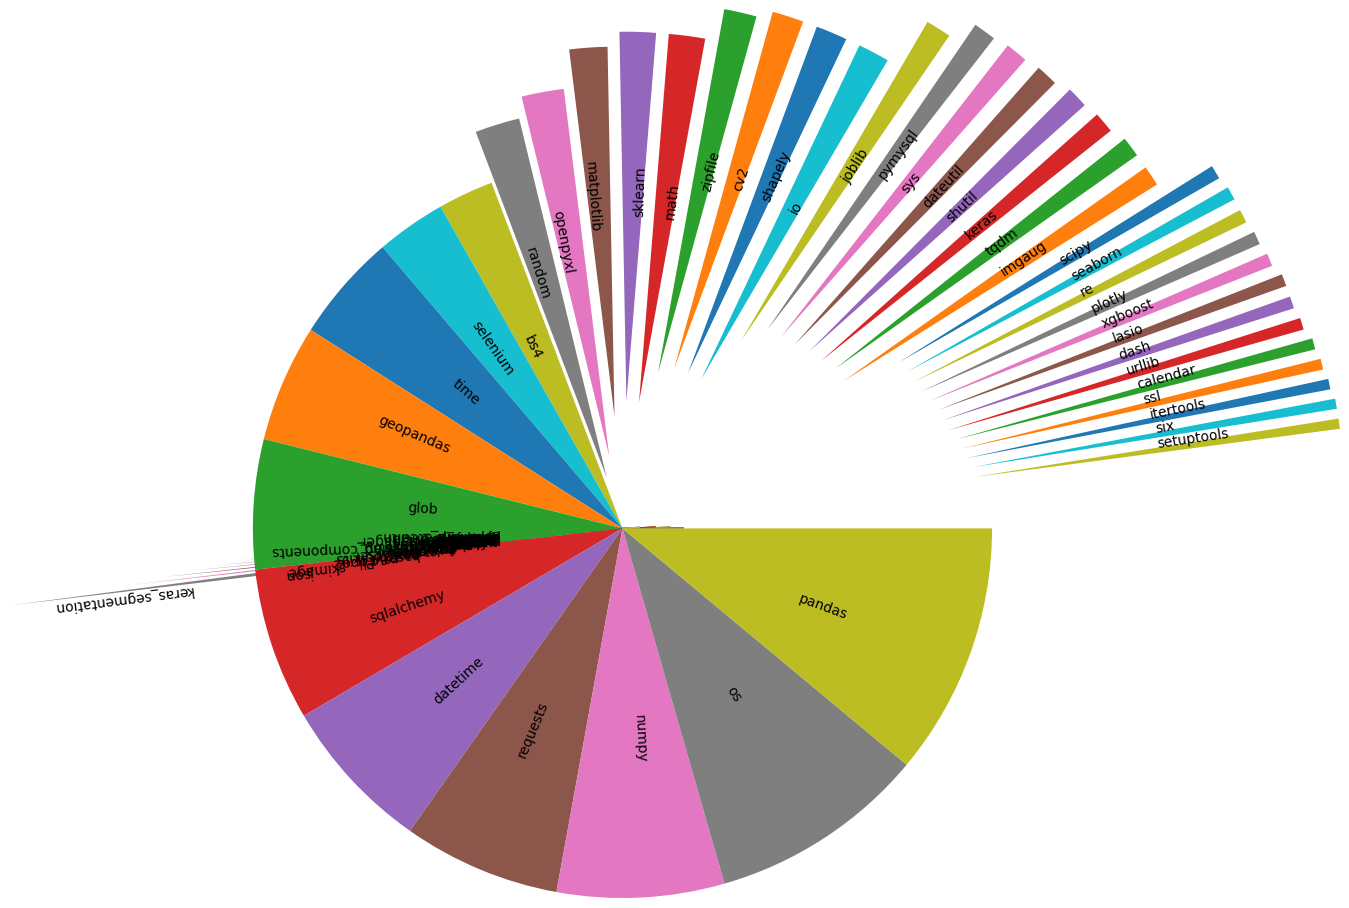

In [183]:
feats = list(libN.values())
labels = list(libN.keys())
explode = [0 if x >= 150 else (150-x)/50 for x  in feats]
explode = [x if x < 2.5 else (1/(x)) for x in explode]
plt.pie(feats,labels=labels,explode=explode,radius=2.5,rotatelabels=True,labeldistance=0.5)
plt.show()

In [180]:
explode

[2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 2.98,
 3.020408163265306,
 3.020408163265306,
 3.020408163265306,
 3.020408163265306,
 3.020408163265306,
 3.020408163265306,
 3.020408163265306,
 3.020408163265306,
 3.0625,
 3.0625,
 3.0625,
 3.0625,
 3.0625,
 3.1063829787234045,
 3.1063829787234045,
 3.1063829787234045,
 3.1063829787234045,
 3.1063829787234045,
 3.1521739130434785,
 3.1521739130434785,
 3.2,
 3.2,
 3.2500000000000004,
 3.302325581395349,
 3.3571428571428577,
 3.414634146341464,
 3.605263157894736,
 2.4,
 2.4,
 2.38,
 2.36,
 2.34,
 2.3,
 2.28,
 2.28,
 2.24,
 2.22,
 2.2,
 2.2,
 2.18,
 1.8,
 1.8,
 1.76,
 1.74,
 1.7,
 1.68,
 1.66,
 1.5,
 1.14,
 1.14,
 1.14,
 1.08,
 0.86,
 0.86,
 0.76,
 0.5,
 0.36,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
import numpy as np